
# NBA - First Query

## Prediction of Classification using Nba Statistics

### Libraries import

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.regression.linear_model import OLS

### Reading file 

In [24]:
try:
    nba = pd.read_excel('Data_csvs\\nba_data_file.xlsx')
except: 
    print("No data Found")

### First examination of data

In [25]:
rows, columns = nba.shape
print('We have:', rows, 'rows and:', columns, "columns.")

We have: 6777 rows and: 41 columns.


In [26]:
nba.head()

,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,...,BPG,FPG,MPG,TPG,FT%,FG%,3P%,W,L,W/L%
0,2017 - 2018,Regular_Season,Bradley Beal,WAS,82,2976.8,683,1484,199,530,...,0.44,1.95,36.30,2.61,0.791328,0.460243,0.375472,20,16,0.556
1,2017 - 2018,Regular_Season,Otto Porter,WAS,77,2431.6,445,885,138,313,...,0.53,1.96,31.58,0.97,0.828125,0.502825,0.440895,20,16,0.556
2,2017 - 2018,Regular_Season,"Kelly Oubre, Jr.",WAS,81,2230.5,318,790,126,369,...,0.43,2.89,27.54,1.11,0.819742,0.402532,0.341463,20,16,0.556
3,2017 - 2018,Regular_Season,Markieff Morris,WAS,73,1967.9,330,687,76,207,...,0.52,2.96,26.96,1.74,0.820312,0.480349,0.367150,20,16,0.556
4,2017 - 2018,Regular_Season,Marcin Gortat,WAS,82,2074.6,290,560,0,0,...,0.74,2.13,25.30,1.21,0.674847,0.517857,NaN,20,16,0.556


In [27]:
nba.describe()

,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,...,BPG,FPG,MPG,TPG,FT%,FG%,3P%,W,L,W/L%
count,6777.000000,6777.000000,6777.000000,6777.000000,6777.000000,6777.000000,6777.000000,6777.000000,6777.000000,6777.000000,...,6777.000000,6777.000000,6777.000000,6777.000000,5544.000000,6650.000000,4219.000000,6777.000000,6777.000000,6777.000000
mean,48.957798,1311.102184,206.097683,451.552900,37.853180,104.851852,103.760218,136.049579,75.020068,110.591855,...,0.535188,2.322480,26.654179,1.496797,0.752818,0.450697,0.346245,44.142984,34.005312,0.564443
std,32.093728,984.908559,185.800694,400.855463,50.503271,132.955019,114.074234,145.094172,68.239060,81.287715,...,0.565629,0.776314,8.768929,0.864591,0.105822,0.066589,0.070141,12.556663,11.725837,0.134607
min,3.000000,60.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.830000,0.000000,0.142857,0.120000,0.000000,7.000000,8.000000,0.106000
25%,11.000000,260.000000,36.000000,83.000000,1.000000,4.000000,17.000000,24.000000,13.000000,25.000000,...,0.170000,1.790000,19.810000,0.850000,0.699912,0.412453,0.310928,37.000000,26.000000,0.500000
50%,68.000000,1335.000000,168.000000,369.000000,12.000000,36.000000,66.000000,90.000000,61.000000,116.000000,...,0.340000,2.290000,27.020000,1.320000,0.769597,0.445541,0.354037,46.000000,33.000000,0.573000
75%,78.000000,2163.500000,322.000000,712.000000,64.000000,183.000000,149.000000,199.000000,117.000000,178.000000,...,0.710000,2.830000,33.830000,2.000000,0.825000,0.485787,0.388889,53.000000,41.000000,0.659000
max,85.000000,3485.000000,978.000000,2173.000000,402.000000,886.000000,756.000000,972.000000,464.000000,371.000000,...,4.330000,5.330000,47.600000,6.250000,1.000000,0.833333,0.650000,73.000000,72.000000,0.890000


In [28]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       6777 non-null   object 
 1   Stage        6777 non-null   object 
 2   Player       6777 non-null   object 
 3   Team         6777 non-null   object 
 4   GP           6777 non-null   int64  
 5   MIN          6777 non-null   float64
 6   FGM          6777 non-null   int64  
 7   FGA          6777 non-null   int64  
 8   3PM          6777 non-null   int64  
 9   3PA          6777 non-null   int64  
 10  FTM          6777 non-null   int64  
 11  FTA          6777 non-null   int64  
 12  TOV          6777 non-null   int64  
 13  PF           6777 non-null   int64  
 14  ORB          6777 non-null   int64  
 15  DRB          6777 non-null   int64  
 16  REB          6777 non-null   int64  
 17  AST          6777 non-null   int64  
 18  STL          6777 non-null   int64  
 19  BLK   

### Conclusions:
- We have in the data seasonal statistics for Nba players.
- The data is time chronically distributed. (Per season, in years)
- We have categorial data as well as numeric data and percentage data (object, int, float).
- We have 3 percentage columns with Nan values (less then 25 shots didn't count).

# EDA - Exploratory data analysis

## Prepare data for analysis

### Remove e-relevent columns

In [29]:
nba.columns

Index(['Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM', 'FGA', '3PM',
       '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL',
       'BLK', 'PTS', 'birth_date', 'height_cm', 'weight_kg', 'nationality',
       'PPG', 'APG', 'RPG', 'ORPG', 'DRPG', 'SPG', 'BPG', 'FPG', 'MPG', 'TPG',
       'FT%', 'FG%', '3P%', 'W', 'L', 'W/L%'],
      dtype='object')

In [30]:
nba_1 = nba.drop(['Season', 'Stage', 'Team', 'GP', 'MIN', 'FGM', 'FGA', '3PM',
       '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL',
       'BLK', 'PTS', 'birth_date', 'height_cm', 'weight_kg', 'nationality',
        'W', 'L', 'W/L%'], axis=1).round(2)
nba_1

,Player,PPG,APG,RPG,ORPG,DRPG,SPG,BPG,FPG,MPG,TPG,FT%,FG%,3P%
0,Bradley Beal,22.65,4.55,4.43,0.74,3.68,1.17,0.44,1.95,36.30,2.61,0.79,0.46,0.38
1,Otto Porter,14.73,2.04,6.39,1.34,5.05,1.51,0.53,1.96,31.58,0.97,0.83,0.50,0.44
2,"Kelly Oubre, Jr.",11.77,1.21,4.48,0.73,3.75,0.99,0.43,2.89,27.54,1.11,0.82,0.40,0.34
3,Markieff Morris,11.52,1.95,5.60,1.03,4.58,0.77,0.52,2.96,26.96,1.74,0.82,0.48,0.37
4,Marcin Gortat,8.41,1.84,7.60,2.21,5.39,0.49,0.74,2.13,25.30,1.21,0.67,0.52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6772,Alan Henderson,13.21,0.94,6.96,3.23,3.73,0.99,0.66,2.84,33.84,1.70,0.67,0.46,NaN
6773,Dikembe Mutombo,11.49,1.28,14.11,3.71,10.40,0.33,3.28,3.02,36.39,2.12,0.71,0.56,NaN
6774,Jason Terry,8.11,4.27,2.05,0.30,1.75,1.11,0.12,1.64,23.31,1.93,0.81,0.42,0.29
6775,Bimbo Coles,8.06,3.62,2.15,0.38,1.78,0.72,0.14,2.22,24.05,1.29,0.82,0.45,0.21


## EDA - Exploratory Data Analysis

- We will change the BMI column into a categorial value column using k-means algorithm.
- We will try to predict the BMI column with the statistics of the players.

In [31]:
nba_1.describe().round(3)

,PPG,APG,RPG,ORPG,DRPG,SPG,BPG,FPG,MPG,TPG,FT%,FG%,3P%
count,6777.000,6777.000,6777.000,6777.000,6777.000,6777.000,6777.000,6777.000,6777.000,6777.000,5544.000,6650.000,4219.000
mean,11.033,2.347,4.636,1.209,3.426,0.818,0.535,2.322,26.654,1.497,0.753,0.451,0.346
std,6.239,1.999,2.667,0.937,1.933,0.477,0.566,0.776,8.769,0.865,0.106,0.067,0.070
min,0.330,0.000,0.140,0.000,0.110,0.000,0.000,0.000,3.830,0.000,0.140,0.120,0.000
25%,6.310,0.940,2.680,0.490,2.030,0.480,0.170,1.790,19.810,0.850,0.700,0.410,0.310
50%,9.800,1.740,4.000,0.950,3.000,0.740,0.340,2.290,27.020,1.320,0.770,0.450,0.350
75%,14.470,3.140,6.060,1.730,4.400,1.070,0.710,2.830,33.830,2.000,0.820,0.490,0.390
max,37.400,13.270,18.670,6.000,13.830,3.560,4.330,5.330,47.600,6.250,1.000,0.830,0.650


In [32]:
nba_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  6777 non-null   object 
 1   PPG     6777 non-null   float64
 2   APG     6777 non-null   float64
 3   RPG     6777 non-null   float64
 4   ORPG    6777 non-null   float64
 5   DRPG    6777 non-null   float64
 6   SPG     6777 non-null   float64
 7   BPG     6777 non-null   float64
 8   FPG     6777 non-null   float64
 9   MPG     6777 non-null   float64
 10  TPG     6777 non-null   float64
 11  FT%     5544 non-null   float64
 12  FG%     6650 non-null   float64
 13  3P%     4219 non-null   float64
dtypes: float64(13), object(1)
memory usage: 741.4+ KB


In [33]:
nba_1.isna().sum()

Player       0
PPG          0
APG          0
RPG          0
ORPG         0
DRPG         0
SPG          0
BPG          0
FPG          0
MPG          0
TPG          0
FT%       1233
FG%        127
3P%       2558
dtype: int64

### Conclusions:
- 3 columns with Nan values (FT%, FG%, 3P%).
- Player column is a string (object).
- We have a high std in most of the columns.
 


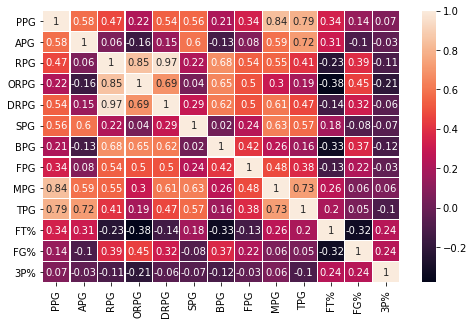

In [34]:
plt.figure(figsize=(8,5))
sns.heatmap(nba_1.corr().round(2), annot=True, linewidth=0.1)
plt.show()

### Conclusions:

High correlation between:

All of those correlation are > 0.6.
- ORPG & (RPG)
- DRPG & (RPG, ORPG)
- SPG & (APG)
- BPG & (RPG, DRPG, ORPG)
- MPG & (PPG, DRPG, SPG)
- TPG & (PPG, APG, MPG)

From those correlation we can say:
- The RPG columns is enough (no need of ORPG & ORPG).
- The percantage columns are with low correlation and have Nan values. 
- The Player column doesn't help us so we will drop it.

### Drop the columns from conclusion

In [35]:
nba_1.drop(['ORPG', 'DRPG', 'FT%', 'FG%', '3P%'], axis=1, inplace=True)
nba_1

,Player,PPG,APG,RPG,SPG,BPG,FPG,MPG,TPG
0,Bradley Beal,22.65,4.55,4.43,1.17,0.44,1.95,36.30,2.61
1,Otto Porter,14.73,2.04,6.39,1.51,0.53,1.96,31.58,0.97
2,"Kelly Oubre, Jr.",11.77,1.21,4.48,0.99,0.43,2.89,27.54,1.11
3,Markieff Morris,11.52,1.95,5.60,0.77,0.52,2.96,26.96,1.74
4,Marcin Gortat,8.41,1.84,7.60,0.49,0.74,2.13,25.30,1.21
...,...,...,...,...,...,...,...,...,...
6772,Alan Henderson,13.21,0.94,6.96,0.99,0.66,2.84,33.84,1.70
6773,Dikembe Mutombo,11.49,1.28,14.11,0.33,3.28,3.02,36.39,2.12
6774,Jason Terry,8.11,4.27,2.05,1.11,0.12,1.64,23.31,1.93
6775,Bimbo Coles,8.06,3.62,2.15,0.72,0.14,2.22,24.05,1.29


### PreProcessing

Before we begin with the prediction we need a few things to do first:

    We would like to make a cluster column.
    
    We will use the K-Means algorithem to to split the column into categorial rankings.
    
    After spliting the column into K Groups (['Group 1', 'Group 2', ... , 'Group K'])
    
    Then we will proceed toward the statistics prediction.
    

In [36]:
nba = nba_1[['Player', 'PPG', 'APG', 'RPG', 'SPG', 'BPG', 'FPG', 'MPG', 'TPG']]
nba

,Player,PPG,APG,RPG,SPG,BPG,FPG,MPG,TPG
0,Bradley Beal,22.65,4.55,4.43,1.17,0.44,1.95,36.30,2.61
1,Otto Porter,14.73,2.04,6.39,1.51,0.53,1.96,31.58,0.97
2,"Kelly Oubre, Jr.",11.77,1.21,4.48,0.99,0.43,2.89,27.54,1.11
3,Markieff Morris,11.52,1.95,5.60,0.77,0.52,2.96,26.96,1.74
4,Marcin Gortat,8.41,1.84,7.60,0.49,0.74,2.13,25.30,1.21
...,...,...,...,...,...,...,...,...,...
6772,Alan Henderson,13.21,0.94,6.96,0.99,0.66,2.84,33.84,1.70
6773,Dikembe Mutombo,11.49,1.28,14.11,0.33,3.28,3.02,36.39,2.12
6774,Jason Terry,8.11,4.27,2.05,1.11,0.12,1.64,23.31,1.93
6775,Bimbo Coles,8.06,3.62,2.15,0.72,0.14,2.22,24.05,1.29


2 Ways:
1. Normalization then K-Means on all
2. PCA and then K-means

### First try:
- Normalize data with standard scaler (without BMI column).
- Searching for best K for k-means algorithem. Ploting and then chosing the best.
- Fit the data by the K we chose.

In [37]:
my_scaler = StandardScaler()
nba_normalized = my_scaler.fit_transform(nba[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'FPG', 'MPG', 'TPG']])
nba_normalized

array([[ 1.86233437,  1.10220363, -0.07715378, ..., -0.47984157,
         1.10008104,  1.28764451],
       [ 0.59272315, -0.15340639,  0.657695  , ..., -0.46695924,
         0.56177721, -0.6093465 ],
       [ 0.11822199, -0.56860811, -0.05840764, ...,  0.73109736,
         0.10102562, -0.44740824],
       ...,
       [-0.46849229,  0.96213558, -0.96947015, ..., -0.87919378,
        -0.38139498,  0.50108726],
       [-0.47650751,  0.63697761, -0.93197787, ..., -0.13201869,
        -0.29699988, -0.23920191],
       [-0.81154381, -1.03383413, -0.212126  , ...,  0.49921544,
        -1.20709832, -0.71344966]])

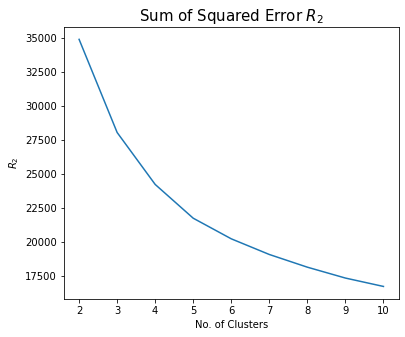

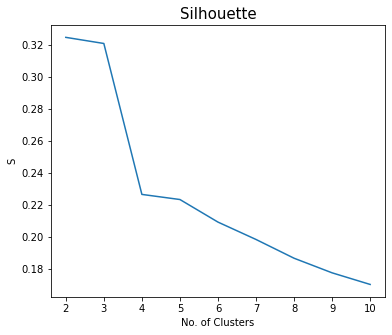

In [38]:
sum_squared_1 = []
silhouette_1 = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(nba_normalized)
    sum_squared_1.append(kmeans.inertia_)
    silhouette_1.append(silhouette_score(nba_normalized, kmeans.labels_))
    
plt.figure(figsize=(6,5))    
plt.plot(range(2, 11), sum_squared_1)
plt.title(r'Sum of Squared Error ${R_2}$', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel(r'${R_2}$')
plt.show()
plt.figure(figsize=(6,5))
plt.plot(range(2, 11), silhouette_1)
plt.title('Silhouette', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel('S')
plt.show()

Best K for the Algorithem is k=3

In [39]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(nba_normalized)

KMeans(n_clusters=3)

In [40]:
nba.loc[0:,'Label'] = pd.Series(kmeans.labels_)
nba

,Player,PPG,APG,RPG,SPG,BPG,FPG,MPG,TPG,Label
0,Bradley Beal,22.65,4.55,4.43,1.17,0.44,1.95,36.30,2.61,2
1,Otto Porter,14.73,2.04,6.39,1.51,0.53,1.96,31.58,0.97,2
2,"Kelly Oubre, Jr.",11.77,1.21,4.48,0.99,0.43,2.89,27.54,1.11,1
3,Markieff Morris,11.52,1.95,5.60,0.77,0.52,2.96,26.96,1.74,0
4,Marcin Gortat,8.41,1.84,7.60,0.49,0.74,2.13,25.30,1.21,1
...,...,...,...,...,...,...,...,...,...,...
6772,Alan Henderson,13.21,0.94,6.96,0.99,0.66,2.84,33.84,1.70,0
6773,Dikembe Mutombo,11.49,1.28,14.11,0.33,3.28,3.02,36.39,2.12,0
6774,Jason Terry,8.11,4.27,2.05,1.11,0.12,1.64,23.31,1.93,1
6775,Bimbo Coles,8.06,3.62,2.15,0.72,0.14,2.22,24.05,1.29,1


<AxesSubplot:>

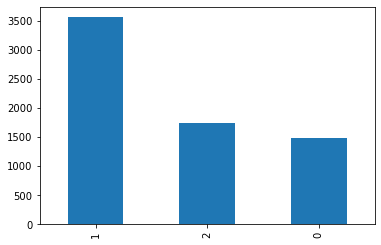

In [41]:
nba.Label.value_counts().plot(kind='bar')

In [42]:
clusters = list(nba.groupby("Label"))
for cluster in clusters:
    print("Cluster Number:", cluster[0], '\n')
    print("Cluster Measures:", "\n", cluster[1].drop(columns=["Label"]).describe(),'\n')

Cluster Number: 0 

Cluster Measures: 
                PPG          APG          RPG          SPG          BPG  \
count  1481.000000  1481.000000  1481.000000  1481.000000  1481.000000   
mean     13.321762     1.755611     8.185199     0.800473     1.245949   
std       5.266652     1.017939     2.405600     0.378593     0.706611   
min       1.000000     0.000000     2.250000     0.000000     0.000000   
25%       9.590000     1.000000     6.500000     0.520000     0.720000   
50%      12.680000     1.570000     7.800000     0.750000     1.140000   
75%      16.590000     2.330000     9.600000     1.000000     1.670000   
max      32.000000     6.470000    18.670000     2.470000     4.330000   

               FPG          MPG          TPG  
count  1481.000000  1481.000000  1481.000000  
mean      3.041431    31.611857     1.728582  
std       0.632046     5.254116     0.674280  
min       1.000000    15.400000     0.200000  
25%       2.620000    27.830000     1.260000  
50%       3

### Conclusion:
- Three different clusters.
- We got one cluster who is the main with most of the data and the 2 other Clusters with approximatly the same amount of data.
- The min/max are rounded.
- The next conclusions are by size, (biggest, middle, lowest)

#### Highest Cluster:
- 0-20 PPG, 0-7 APG, 0-9 RPG, 0-2.1 SPG, 0-2.1 BPG, 0-5 FPG, 3.8-37.9 MPG, 0-3.5 TPG.
- Probably we are looking and the average player statistics. Suggested because avg data.

#### Middle Cluster:
- 1-32 PPG, 0-6.5 APG, 2.25-18.7 RPG, 0-2.5 SPG, 0-4.3 BPG, 1-5.3 FPG, 15-47 MPG, 0.2-5.5 TPG.
- Probably most of those players are physically bigger (SF, PF, C roles). Suggested because of high PPG, RPG, BPG.

#### Smallest Cluster:
- 4.2-37.4 PPG, 0.4-13 APG, 0.6-13 RPG, 0-3.6 SPG, 0-1.9 BPG, 0.5-4.75 FPG, 20.2-47.6 MPG, 0.25-6.25 TPG.
- Probably most of those players are physically smaller (PG, SG, SF roles) . Suggested because of high PPG, APG, SPG.

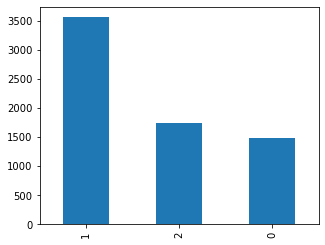

In [43]:
plt.figure(figsize=(5,4))
nba.Label.value_counts().plot(kind='bar')
plt.show()

### Conclusions:
- After separating to 3 clusters we can use other algorithem to try to predict the data.
- We will first begin with RandomForest

In [44]:
nba['Cluster'] = nba.Label
nba.drop(['Label', 'Player'],axis=1, inplace=True)

In [45]:
nba

,PPG,APG,RPG,SPG,BPG,FPG,MPG,TPG,Cluster
0,22.65,4.55,4.43,1.17,0.44,1.95,36.30,2.61,2
1,14.73,2.04,6.39,1.51,0.53,1.96,31.58,0.97,2
2,11.77,1.21,4.48,0.99,0.43,2.89,27.54,1.11,1
3,11.52,1.95,5.60,0.77,0.52,2.96,26.96,1.74,0
4,8.41,1.84,7.60,0.49,0.74,2.13,25.30,1.21,1
...,...,...,...,...,...,...,...,...,...
6772,13.21,0.94,6.96,0.99,0.66,2.84,33.84,1.70,0
6773,11.49,1.28,14.11,0.33,3.28,3.02,36.39,2.12,0
6774,8.11,4.27,2.05,1.11,0.12,1.64,23.31,1.93,1
6775,8.06,3.62,2.15,0.72,0.14,2.22,24.05,1.29,1


## Prediction of cluster
### Lets use a Decision tree in 0.2-0.4 test size

Text(0, 0.5, 'Accuracy')

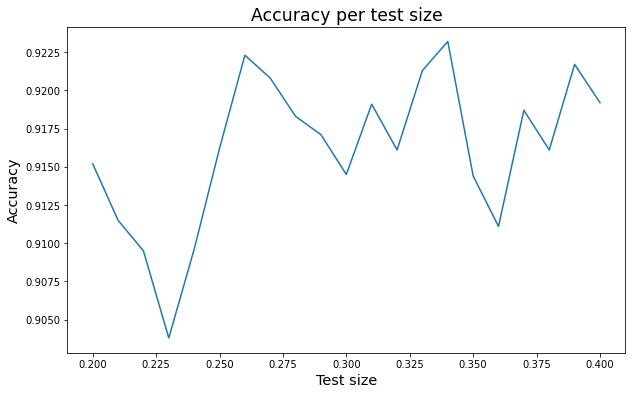

In [46]:
test_size_list = np.arange(0.2,0.41,0.01)
accuracy_dict_1 = {}
accuracy_dict_display_1 = {}
for i in test_size_list:
    X = nba[['PPG','APG','RPG','SPG','BPG','FPG','MPG','TPG']]
    y = nba[['Cluster']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy_dict_1[round(i,3)] = round(accuracy_score(y_test, y_pred),4) 
    accuracy_dict_display_1[round(i,3)] = round(accuracy_score(y_test, y_pred),4)

plt.figure(figsize=(10,6))
plt.plot(accuracy_dict_1.keys(),accuracy_dict_1.values())
plt.title('Accuracy per test size', size='xx-large')
plt.xlabel('Test size', size='x-large')
plt.ylabel('Accuracy', size='x-large')

## Conclusions
##### We are interested in the main diagonal. He gives us the amount of sucessfull prediction.
1. Main diagonal shows us at spot (0,0) the sum of successfull prediction of Cluster 0.
2. Main diagonal shows us at spot (1,1) the sum of successfull prediction of Cluster 1.
3. Main diagonal shows us at spot (2,2) the sum of successfull  prediction of Cluster 2.

##### Conclusion for figure 4-24 in order:
1. Predict cluster class by all the columns.
2. 90%+ accuracy in all test sizes.
3. Best predictions: 0.25-0.3.
4. Lowest predictions: 0.2-0.24

##### Conclusion about predicted test size of 0.25 at figure 10:
1. Around 40 mistakes in cluster 0 prediction.
2. Around 50 mistakes in cluster 1 prediction.
3. Around 35 mistakes in cluster 2 prediction.


## Let's see the corralation between our columns

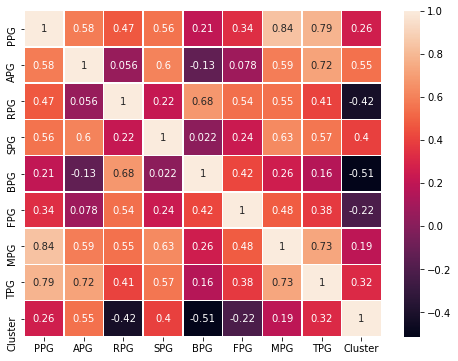

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(nba.corr(),annot=True, linewidth=0.5)
plt.show()

### Prediction accuracy by each column

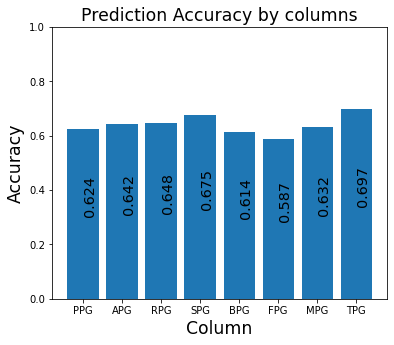

In [48]:
X_1 = nba[['PPG']]
X_2 = nba[['APG']]
X_3 = nba[['RPG']]
X_4 = nba[['SPG']]
X_5 = nba[['BPG']]
X_6 = nba[['FPG']]
X_7 = nba[['MPG']]
X_8 = nba[['TPG']]
y = nba[['Cluster']]

X_list = [X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8]
X_name_list = ['PPG', 'APG','RPG','SPG','BPG','FPG','MPG','TPG']
count = 0
pred_dict = {}
pred_corr_dict = {}

for x in X_list:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    pred_dict[X_name_list[count]] = accuracy_score(y_test, y_pred).round(3)
    pred_corr_dict[nba.Cluster.corr(nba[X_name_list[count]]).round(3)] =  accuracy_score(y_test, y_pred).round(3)
    count +=1
    
plt.figure(figsize=(6,5))
plt.bar(pred_dict.keys(), pred_dict.values())
plt.xlabel('Column', size='xx-large')
plt.ylabel('Accuracy', size='xx-large')
plt.title('Prediction Accuracy by columns', size='xx-large')
plt.ylim(top=1)
for key, value in enumerate(pred_dict.values()):
    plt.text(key, 0.5*value, value, rotation=90, size='x-large')
plt.show()

### Conclusion:
1. TPG is the highest column to predict by.
2. FPG is with the lowest prediction rate.

## Mutual information
- Lets watch the dependecies between our columns.

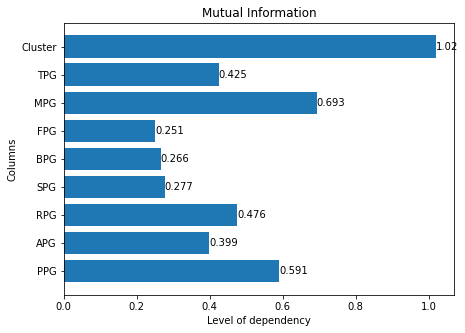

In [49]:
mi_1 = mutual_info_classif(nba, nba.Cluster, discrete_features = True)
plt.figure(figsize=(7,5))
plt.barh(nba.columns, mi_1)
plt.title('Mutual Information')
plt.ylabel('Columns')
plt.xlabel('Level of dependency')
for i,v in enumerate(mi_1):
    plt.text(v, i-0.1, s=round(v,3))
plt.show()

### Conclusions
1.

# Use PCA algorithem on the data

In [50]:
nba

,PPG,APG,RPG,SPG,BPG,FPG,MPG,TPG,Cluster
0,22.65,4.55,4.43,1.17,0.44,1.95,36.30,2.61,2
1,14.73,2.04,6.39,1.51,0.53,1.96,31.58,0.97,2
2,11.77,1.21,4.48,0.99,0.43,2.89,27.54,1.11,1
3,11.52,1.95,5.60,0.77,0.52,2.96,26.96,1.74,0
4,8.41,1.84,7.60,0.49,0.74,2.13,25.30,1.21,1
...,...,...,...,...,...,...,...,...,...
6772,13.21,0.94,6.96,0.99,0.66,2.84,33.84,1.70,0
6773,11.49,1.28,14.11,0.33,3.28,3.02,36.39,2.12,0
6774,8.11,4.27,2.05,1.11,0.12,1.64,23.31,1.93,1
6775,8.06,3.62,2.15,0.72,0.14,2.22,24.05,1.29,1


We already made the normalized data so lets call it

In [51]:
nba_normalized[:5]

array([[ 1.86233437,  1.10220363, -0.07715378,  0.73876122, -0.16829972,
        -0.47984157,  1.10008104,  1.28764451],
       [ 0.59272315, -0.15340639,  0.657695  ,  1.45216214, -0.00917301,
        -0.46695924,  0.56177721, -0.6093465 ],
       [ 0.11822199, -0.56860811, -0.05840764,  0.36107837, -0.18598046,
         0.73109736,  0.10102562, -0.44740824],
       [ 0.07814588, -0.19842826,  0.36150595, -0.10053399, -0.02685376,
         0.82127367,  0.03487812,  0.28131391],
       [-0.42040096, -0.253455  ,  1.11135164, -0.68804064,  0.36212264,
        -0.24795965, -0.15444061, -0.33173806]])

In [52]:
pca_2D = PCA(n_components=2)
prinicipal_components = pca_2D.fit_transform(nba_normalized)
pca_data = pd.DataFrame(data = prinicipal_components, columns = ['principal component 1', 'principal component 2'])

In [53]:
pca_data

,principal component 1,principal component 2
0,2.279798,-1.389252
1,0.774390,-0.150342
2,-0.007606,0.343151
3,0.401253,0.522019
4,-0.373206,1.036461
...,...,...
6772,1.004237,0.915480
6773,2.512029,5.221233
6774,-0.301301,-1.821128
6775,-0.750634,-1.040424


In [54]:
pca_2D.explained_variance_ratio_

array([0.52319442, 0.22764793])

### Conclusion:
- In 2D we have 75% of the data preserved.

In [55]:
pca_data['Cluster'] = nba.Cluster
pca_data

,principal component 1,principal component 2,Cluster
0,2.279798,-1.389252,2
1,0.774390,-0.150342,2
2,-0.007606,0.343151,1
3,0.401253,0.522019,0
4,-0.373206,1.036461,1
...,...,...,...
6772,1.004237,0.915480,0
6773,2.512029,5.221233,0
6774,-0.301301,-1.821128,1
6775,-0.750634,-1.040424,1


<AxesSubplot:>

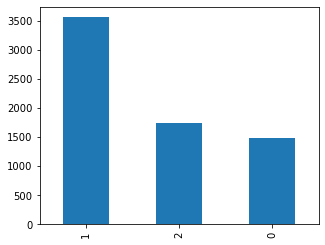

In [56]:
plt.figure(figsize=(5,4))
pca_data.Cluster.value_counts().plot(kind='bar')

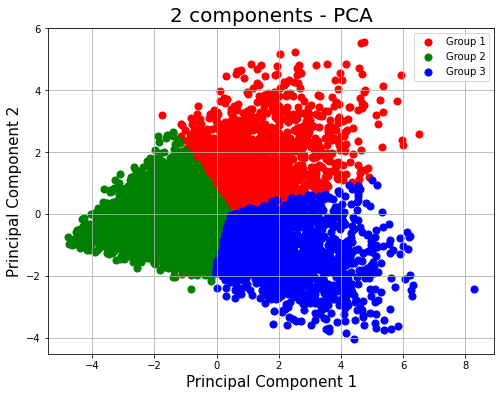

In [57]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components - PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indices = pca_data['Cluster'] == target
    ax.scatter(pca_data.loc[indices, 'principal component 1']
                ,pca_data.loc[indices, 'principal component 2']
                ,c = color
                ,s = 50)
ax.legend(['Group 1', 'Group 2', 'Group 3'])
ax.grid()

#### Conclusion:
1. We can see a linear regression possibility because of the clear separation in the data.
2. The data looks very man played, not sure we can get to much information from this.

### Let's try to make a 3d patern of the data

In [58]:
pca_3D = PCA(n_components=3)
prinicipal_components = pca_3D.fit_transform(nba_normalized)
pca_data_3D = pd.DataFrame(data = prinicipal_components, columns = ['principal component 1',
                                                                    'principal component 2',
                                                                    'principal component 3'])

In [59]:
pca_3D.explained_variance_ratio_

array([0.52319442, 0.22764793, 0.07380696])

### Conclusion:
- In 3D we have 82.5% of the data preserved.

In [60]:
pca_data_3D['Cluster'] = nba.Cluster
pca_data_3D

,principal component 1,principal component 2,principal component 3,Cluster
0,2.279798,-1.389252,0.789849,2
1,0.774390,-0.150342,0.298567,2
2,-0.007606,0.343151,-0.836612,1
3,0.401253,0.522019,-0.577536,0
4,-0.373206,1.036461,0.575540,1
...,...,...,...,...
6772,1.004237,0.915480,-0.338955,0
6773,2.512029,5.221233,2.144859,0
6774,-0.301301,-1.821128,0.158201,1
6775,-0.750634,-1.040424,-0.382051,1


### Lets plot the data in 3D

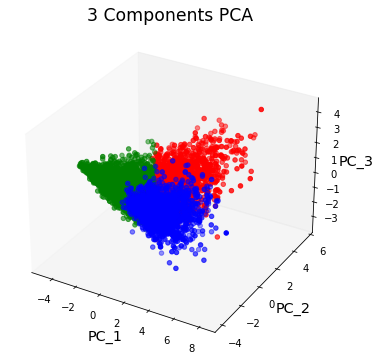

In [61]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 0],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 0],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 0],
           zdir='z', s=20, c='r', depthshade=True)
ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 1],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 1],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 1],
           zdir='z', s=20, c='g', depthshade=True)
ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 2],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 2],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 2],
           zdir='z', s=20, c='b', depthshade=True)

plt.title('3 Components PCA', size='xx-large')
ax.set_xlabel('PC_1', size='x-large')
ax.set_ylabel('PC_2', size='x-large')
ax.set_zlabel('PC_3', size='x-large')
ax.grid(False)


#### Conclusion:
- We can see the linear separation throughout the data.
- We have a very slim combination of data in the connection parts.

## After the PCA, lets try to do it otherwise.
### Lets make the MPG column to be equal for all the rows. 
- To do that we need to make the MPG column value equals to 1 proportionally in each row.
- Next we will have a dataframe with 6 columns (without MPG column)
- The dataframe is made of the worth per 1 minutes of play for each player.

In [62]:
new_nba = nba.drop(['Cluster'], axis=1)
new_nba

,PPG,APG,RPG,SPG,BPG,FPG,MPG,TPG
0,22.65,4.55,4.43,1.17,0.44,1.95,36.30,2.61
1,14.73,2.04,6.39,1.51,0.53,1.96,31.58,0.97
2,11.77,1.21,4.48,0.99,0.43,2.89,27.54,1.11
3,11.52,1.95,5.60,0.77,0.52,2.96,26.96,1.74
4,8.41,1.84,7.60,0.49,0.74,2.13,25.30,1.21
...,...,...,...,...,...,...,...,...
6772,13.21,0.94,6.96,0.99,0.66,2.84,33.84,1.70
6773,11.49,1.28,14.11,0.33,3.28,3.02,36.39,2.12
6774,8.11,4.27,2.05,1.11,0.12,1.64,23.31,1.93
6775,8.06,3.62,2.15,0.72,0.14,2.22,24.05,1.29


In [63]:
def proportion(data, col):
    division_num = list(data[col])
    for col, value in data.iteritems():
        data[col] = data[col]/ division_num
        
proportion(new_nba, 'MPG')
new_nba.drop('MPG', axis=1, inplace=True)
new_nba = (new_nba).round(3)
new_nba

,PPG,APG,RPG,SPG,BPG,FPG,TPG
0,0.624,0.125,0.122,0.032,0.012,0.054,0.072
1,0.466,0.065,0.202,0.048,0.017,0.062,0.031
2,0.427,0.044,0.163,0.036,0.016,0.105,0.040
3,0.427,0.072,0.208,0.029,0.019,0.110,0.065
4,0.332,0.073,0.300,0.019,0.029,0.084,0.048
...,...,...,...,...,...,...,...
6772,0.390,0.028,0.206,0.029,0.020,0.084,0.050
6773,0.316,0.035,0.388,0.009,0.090,0.083,0.058
6774,0.348,0.183,0.088,0.048,0.005,0.070,0.083
6775,0.335,0.151,0.089,0.030,0.006,0.092,0.054


# EDA - Exploratory Data Analysis

In [64]:
new_nba.describe()

,PPG,APG,RPG,SPG,BPG,FPG,TPG
count,6777.000000,6777.000000,6777.000000,6777.000000,6777.000000,6777.000000,6777.000000
mean,0.392550,0.082582,0.174808,0.030283,0.020515,0.093223,0.054399
std,0.127266,0.056257,0.079799,0.013819,0.020421,0.035014,0.021373
min,0.028000,0.000000,0.011000,0.000000,0.000000,0.000000,0.000000
25%,0.306000,0.042000,0.109000,0.021000,0.006000,0.069000,0.039000
50%,0.381000,0.066000,0.158000,0.029000,0.013000,0.086000,0.053000
75%,0.467000,0.110000,0.232000,0.038000,0.028000,0.111000,0.067000
max,0.961000,0.364000,0.494000,0.149000,0.134000,0.400000,0.160000


In [65]:
new_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PPG     6777 non-null   float64
 1   APG     6777 non-null   float64
 2   RPG     6777 non-null   float64
 3   SPG     6777 non-null   float64
 4   BPG     6777 non-null   float64
 5   FPG     6777 non-null   float64
 6   TPG     6777 non-null   float64
dtypes: float64(7)
memory usage: 370.7 KB


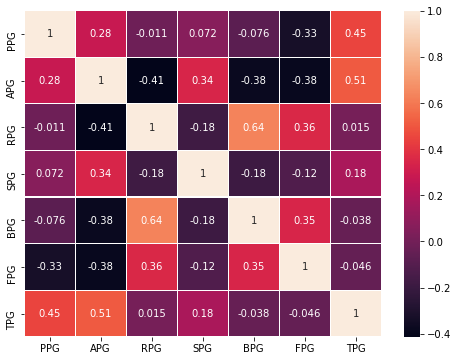

In [66]:
plt.figure(figsize=(8,6))
sns.heatmap(new_nba.corr(), annot=True, linewidth=0.1)
plt.show()

#### Conclusion:
- Low rate of correlation through most of the columns, we can say that we chose to leave the right amount of columns to continue our data research.


### Kmeans Algorithem process

In [ ]:
sum_squared_2 = []
silhouette_2 = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(new_nba)
    sum_squared_2.append(kmeans.inertia_)
    silhouette_2.append(silhouette_score(new_nba, kmeans.labels_))
    
plt.plot(range(2, 11), sum_squared_2)
plt.title(r'Sum of Squred Error ${R_2}$', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel(r'${R_2}$')
plt.show()
plt.plot(range(2, 11), silhouette_1)
plt.title('Silhouette', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel('S')
plt.show()

Lets chose [K = 3]

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(new_nba)

In [ ]:
new_nba.loc[0:,'Cluster'] = pd.Series(kmeans.labels_)
new_nba

In [ ]:
new_nba.Cluster.value_counts().plot(kind='bar')

In [ ]:
clusters = list(new_nba.groupby("Cluster"))
for cluster in clusters:
    print("Cluster Number:", cluster[0], '\n')
    print("Cluster Measures:", "\n", cluster[1].drop(columns=["Cluster"]).describe(),'\n')

### Conclusion:
- Three different clusters.
- Data is classified pretty much equally.
- Our data is normalized to be each player statistics per 1 minute of play.

#### Cluster 0:
- 0.032-0.5 PPG, 0-0.364 APG, 0.011-0.271 RPG, 0-0.139 SPG, 0-0.094 BPG, 0-0.282 FPG, 0-0.16 TPG.
- Probably we are looking and the average player statistics. Suggested because avg data.

#### Cluster 1:
- 0.424-0.961 PPG, 0-0.354 APG, 0.013-0.453 RPG, 0-0.088 SPG, 0-0.11 BPG, 0.013-0.219 FPG, 0.007-0.158 TPG.

#### Cluster 2:
- 0.028-0.496 PPG, 0-0.216 APG, 0.108-0.494 RPG, 0-0.149 SPG, 0-0.134 BPG, 0.027-0.4 FPG, 0-0.156 TPG.

### Decision Tree Classisfier Prediction
Lets look what is the prediction percantage after changing the data to be proportionalized.

In [ ]:
accuracy_dict_2 = {}
for i in test_size_list:
    X = new_nba[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'FPG', 'TPG']]
    y = new_nba['Cluster']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy_dict_2[round(i,3)] = round(accuracy_score(y_test, y_pred),4) 
    
plt.figure(figsize=(10,6))
plt.plot(accuracy_dict_2.keys(),accuracy_dict_2.values())
plt.title('Accuracy per test size', size='xx-large')
plt.xlabel('Test size', size='x-large')
plt.ylabel('Accuracy', size='x-large')

In [ ]:
model = OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
accuracy_dict_2

## Conclusions
##### We are interested in the main diagonal. He gives us the amount of sucessfull prediction.
1. Main diagonal shows us at spot (0,0) the sum of successfull prediction of Cluster 0.
2. Main diagonal shows us at spot (1,1) the sum of successfull prediction of Cluster 1.
3. Main diagonal shows us at spot (2,2) the sum of successfull  prediction of Cluster 2.

##### Conclusion:
1. Predict cluster class by all the columns.
2. 95%+ accuracy in all test sizes.
3. Best predictions: 0.2-0.25.
4. Lowest predictions: 0.35

##### Conclusion about predicted test size of 0.25:
1. Around 25 mistakes in cluster 0 prediction.
2. Around 10 mistakes in cluster 1 prediction.
3. Around 10 mistakes in cluster 2 prediction.


In [ ]:
X_1 = new_nba[['PPG']]
X_2 = new_nba[['APG']]
X_3 = new_nba[['RPG']]
X_4 = new_nba[['SPG']]
X_5 = new_nba[['BPG']]
X_6 = new_nba[['FPG']]
X_7 = new_nba[['TPG']]
y = nba[['Cluster']]

X_list = [X_1, X_2, X_3, X_4, X_5, X_6, X_7]
X_name_list = ['PPG', 'APG','RPG','SPG','BPG','FPG','TPG']
count = 0
pred_dict = {}
pred_corr_dict = {}

for x in X_list:
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    pred_dict[X_name_list[count]] = accuracy_score(y_test, y_pred).round(3)
    pred_corr_dict[nba.Cluster.corr(nba[X_name_list[count]]).round(3)] =  accuracy_score(y_test, y_pred).round(3)
    count +=1
    
plt.figure(figsize=(6,5))
plt.bar(pred_dict.keys(), pred_dict.values())
plt.xlabel('Column', size='xx-large')
plt.ylabel('Accuracy', size='xx-large')
plt.title('Prediction Accuracy by columns', size='xx-large')
plt.ylim(top=1)
for key, value in enumerate(pred_dict.values()):
    plt.text(key, 0.5*value, value, rotation=90, size='x-large')
plt.show()

#### Conclusions

After using minute normalized data we can say:
- The accuracy got lower from before minute normalization. Down by 10%+.
- Above the 50% but still lower then 60%. Not sure if we have high enought accuracy to counclued.

## Mutual Information

In [ ]:
mi_2 = mutual_info_classif(new_nba, new_nba.Cluster, discrete_features = True)
plt.figure(figsize=(7,5))
plt.barh(new_nba.columns, mi_2)
plt.title('Mutual Information')
plt.ylabel('Columns')
plt.xlabel('Level of dependency')
for i,v in enumerate(mi_2):
    plt.text(v, i-0.1, s=round(v,3))
plt.show()

## Conclusion:
1. Highest dependecies between our cluster and the PPG column at 0.605.
2. The RPG column have a 0.428 dependecie with our cluster selection.  

In [ ]:
pca_2D = PCA(n_components=2)
prinicipal_components = pca_2D.fit_transform(nba_normalized)
pca_data = pd.DataFrame(data = prinicipal_components, columns = ['principal component 1', 'principal component 2'])

In [ ]:
pca_data['Cluster'] = new_nba.Cluster
pca_2D.explained_variance_ratio_

In [ ]:
fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 components - PCA', fontsize = 20)
targets = [0,1,2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indices = pca_data['Cluster'] == target
    ax.scatter(pca_data.loc[indices, 'principal component 1']
                ,pca_data.loc[indices, 'principal component 2']
                ,c = color
                ,s = 50)
ax.legend(['Group 1', 'Group 2', 'Group 3'])
ax.grid()

### Conclusions:
1. We have a big part of the data that is in same scatter position.
2. We should check it in 3D to search for the scattering.

In [ ]:
pca_3D = PCA(n_components=3)
prinicipal_components = pca_3D.fit_transform(nba_normalized)
pca_data_3D = pd.DataFrame(data = prinicipal_components, columns = ['principal component 1',
                                                                    'principal component 2',
                                                                    'principal component 3'])

In [ ]:
pca_3D.explained_variance_ratio_

In [ ]:
pca_data_3D['Cluster'] = new_nba.Cluster

In [ ]:
pca_data_3D

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 0],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 0],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 0],
           zdir='z', s=20, c='r', depthshade=True)
ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 1],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 1],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 1],
           zdir='z', s=20, c='g', depthshade=True)
ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 2],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 2],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 2],
           zdir='z', s=20, c='b', depthshade=True)

plt.title('3 Components PCA', size='xx-large')
ax.set_xlabel('PC_1', size='x-large')
ax.set_ylabel('PC_2', size='x-large')
ax.set_zlabel('PC_3', size='x-large')
ax.grid(False)


In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 0],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 0],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 0],
           zdir='z', s=20, c='r', depthshade=True)
ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 1],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 1],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 1],
           zdir='z', s=20, c='g', depthshade=True)
plt.title('3 Components PCA', size='xx-large')
ax.set_xlabel('PC_1', size='x-large')
ax.set_ylabel('PC_2', size='x-large')
ax.set_zlabel('PC_3', size='x-large')
ax.grid(False)
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 2],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 2],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 2],
           zdir='z', s=20, c='b', depthshade=True)
ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 1],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 1],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 1],
           zdir='z', s=20, c='g', depthshade=True)
plt.title('3 Components PCA', size='xx-large')
ax.set_xlabel('PC_1', size='x-large')
ax.set_ylabel('PC_2', size='x-large')
ax.set_zlabel('PC_3', size='x-large')
ax.grid(False)


plt.show()

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 2],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 2],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 2],
           zdir='z', s=20, c='b', depthshade=True)
ax.scatter(pca_data_3D['principal component 1'].loc[pca_data_3D.Cluster == 0],
           pca_data_3D['principal component 2'].loc[pca_data_3D.Cluster == 0],
           pca_data_3D['principal component 3'].loc[pca_data_3D.Cluster == 0],
           zdir='z', s=20, c='r', depthshade=True)
plt.title('3 Components PCA', size='xx-large')
ax.set_xlabel('PC_1', size='x-large')
ax.set_ylabel('PC_2', size='x-large')
ax.set_zlabel('PC_3', size='x-large')
ax.grid(False)
plt.show()

## Conclusion
1.

In [74]:
pca_data_3D.Cluster.var()

0.6988239268210293

## Naive Baise Algorithem for predictions
### Goals 
1. Compare with Decision tree predictions.
2. Get higher results in the predictions.
3. Validate our last assumptions

Normalized by MPG column

Text(0, 0.5, 'Accuracy')

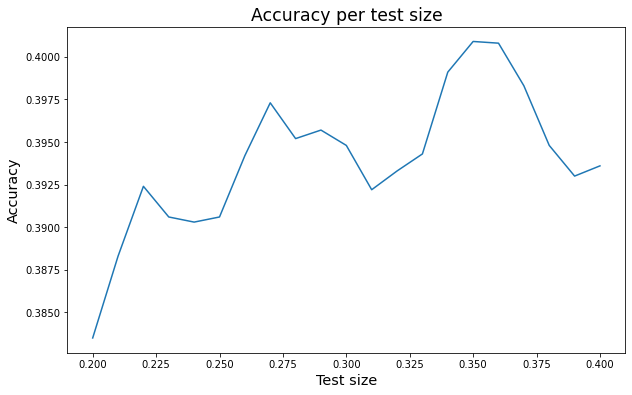

In [75]:
accuracy_dict_NB_1 = {}
for i in test_size_list:
    X = new_nba[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'FPG', 'TPG']]
    y = new_nba['Cluster']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy_dict_NB_1[round(i,3)] = round(accuracy_score(y_test, y_pred),4) 
    
plt.figure(figsize=(10,6))
plt.plot(accuracy_dict_NB_1.keys(),accuracy_dict_NB_1.values())
plt.title('Accuracy per test size', size='xx-large')
plt.xlabel('Test size', size='x-large')
plt.ylabel('Accuracy', size='x-large')

Standard scaler normalization

Text(0, 0.5, 'Accuracy')

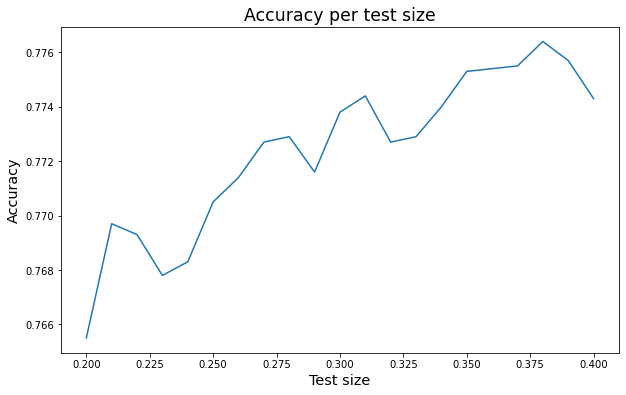

In [80]:
accuracy_dict_NB_2 = {}
for i in test_size_list:
    X = nba[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'FPG', 'MPG', 'TPG']]
    y = nba['Cluster']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    nb = MultinomialNB()
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy_dict_NB_2[round(i,3)] = round(accuracy_score(y_test, y_pred),4) 
    
plt.figure(figsize=(10,6))
plt.plot(accuracy_dict_NB_2.keys(),accuracy_dict_NB_2.values())
plt.title('Accuracy per test size', size='xx-large')
plt.xlabel('Test size', size='x-large')
plt.ylabel('Accuracy', size='x-large')

### Conclusion:

#### Normalized by MPG col:
1. We see that there is a problem with predicting 2 of the clusters.
2. We cant assume nothing from that.

#### Normalized by standard scaler:
1. We are able to get 75%+ accuracy.
2. We still see a problem involving one of the clusters, most of the data by this algorithem seems to get lost in the way.
3. We got 85%+ when using the Decision Tree algorithem, we can see that here also we have a high prediction rate, that means that we have a good quality prediction.


## Logistics Regression for prediction
### Goals 
1. Compare with Decision tree predictions and NB predctions.
2. Get higher results in the predictions.
3. Validate our last assumptions

Normalization by MPG column

Text(0, 0.5, 'Accuracy')

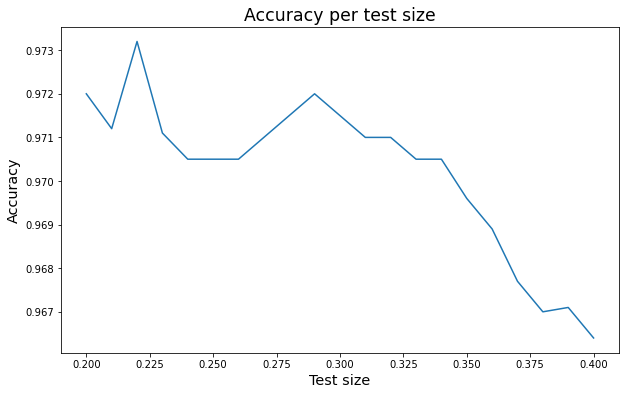

In [81]:
accuracy_dict_LR_1 = {}
for i in test_size_list:
    X = new_nba[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'FPG', 'TPG']]
    y = new_nba['Cluster']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)    
    accuracy_dict_LR_1[round(i,3)] = round(accuracy_score(y_test, y_pred),4) 

plt.figure(figsize=(10,6))
plt.plot(accuracy_dict_LR_1.keys(),accuracy_dict_LR_1.values())
plt.title('Accuracy per test size', size='xx-large')
plt.xlabel('Test size', size='x-large')
plt.ylabel('Accuracy', size='x-large')

Standard scaler normalization

c:\users\sabba\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\sabba\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

c:\users\sabba\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\sabba\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Text(0, 0.5, 'Accuracy')

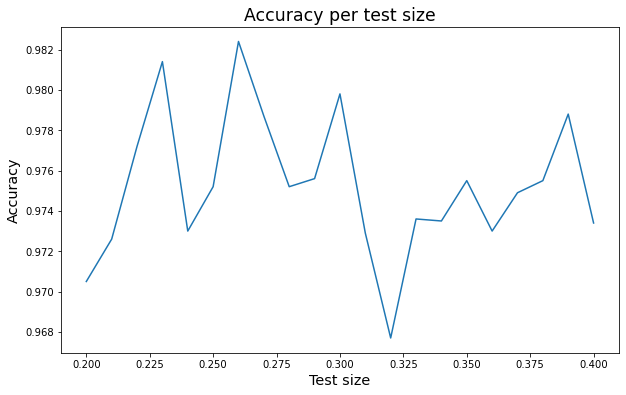

In [82]:
accuracy_dict_LR_2 = {}
for i in test_size_list:
    X = nba[['PPG', 'APG', 'RPG', 'SPG', 'BPG', 'FPG', 'MPG', 'TPG']]
    y = nba['Cluster']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracy_dict_LR_2[round(i,3)] = round(accuracy_score(y_test, y_pred),4) 
    
plt.figure(figsize=(10,6))
plt.plot(accuracy_dict_LR_2.keys(),accuracy_dict_LR_2.values())
plt.title('Accuracy per test size', size='xx-large')
plt.xlabel('Test size', size='x-large')
plt.ylabel('Accuracy', size='x-large')

### Conclusion:

#### Normalized by MPG col:
1. 96.5%-97.5% prediction.
2. We can see that the prediction with logistic regression and with the decision tree are similar, that helps believe that our prediction is validate.


#### Normalized by standard scaler:
1. 96.8%-98% prediction.
2. We have higher accuracy with logistic regression than before with the decision tree.
3. We have approximatly 10% difference between both algorithem, it helps us conclude that our prediction is accurate.


## Linear Regression

In [83]:
def MSE(theta0, theta1, X, y):
    cost_value = 0
    for (xi, yi) in zip(X, y):
        cost_value += 0.5 * ((H(theta0, theta1, xi) - yi)**2)
    return cost_value

def derivatives(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for (xi, yi) in zip(X, y):
        dtheta0 += H(theta0, theta1, xi) - yi
        dtheta1 += (H(theta0, theta1, xi) - yi)*xi
        dtheta0 /= len(X)
        dtheta1 /= len(X)
    return dtheta0, dtheta1

def update_parameters(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = derivatives(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)
    return theta0, theta1

def plot_linear(theta0, theta1, X, y):
    max_x = np.max(X) + 100
    min_x = np.min(X) - 100
    
    xplot = np.linspace(min_x, max_x, 1000)
    yplot = theta0 + theta1 * xplot
    
    plt.plot(xplot, yplot, color='#ff0000', label='Regression Line')
    
    plt.scatter(X,y)
    plt.axis([-10, 10, 0, 200])
    plt.show()

def LinearRegression(X, y):
    theta0 = np.random.rand()
    theta1 = np.random.rand()
    for i in range(0, 800):
        if i % 100 == 0:
            print("Iteration:", i)
            plot_linear(theta0, theta1, X, y)
        theta0, theta1 = update_parameters(theta0, theta1, X, y, 0.005)


TypeError: __init__() missing 1 required positional argument: 'endog'